In [8]:
%matplotlib inline
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
from sys import path
# path.append('..')
from oasis.functions import gen_data, gen_sinusoidal_data, deconvolve, estimate_parameters
from oasis.plotting import simpleaxis
from oasis.oasis_methods import oasisAR1, oasisAR2

In [2]:
def simpleaxis(ax):
    """plot only x and y axis, not a frame for subplot ax"""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

### Load estimates.C + estimates.YrA (= raw temporal fluorescence trace)

In [5]:
est = 'raw_fluorescence.obj'

with open(est, 'rb') as file:
    raw = pickle.load(file)#[0]

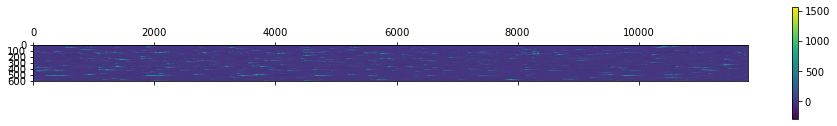

In [6]:
plt.matshow(raw)
plt.colorbar()
plt.show()

## Let's Try All 4: AR(1) and AR(2) (fast vs. slow rising time), L0 vs L1 Constraints

In [329]:
i = 0 # cell ID

### 1. AR(1) and L0

In [174]:
%time c_r1_l0, s_r1_l0, b_r1_l0, g_r1_l0, lam_r1_l0 = deconvolve(raw[i], penalty=0, optimize_g=50, max_iter=50) 

Wall time: 95.8 ms


g is 0.9280246661961138


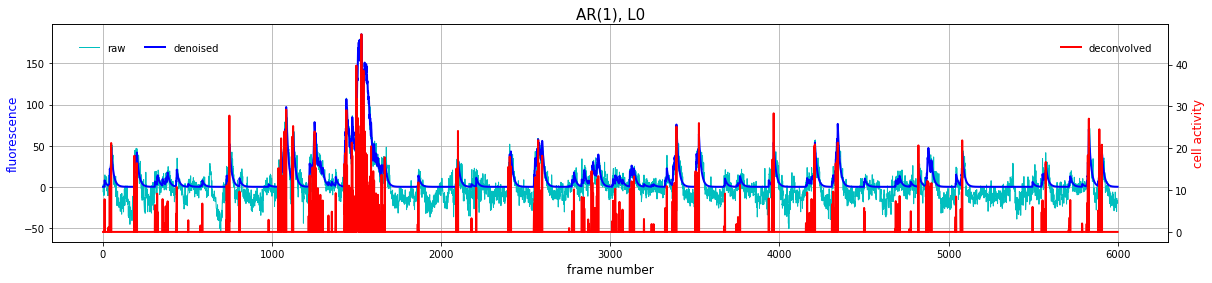

In [324]:
plt.figure(figsize=(20,4))
ax  = plt.gca()
ax2 = ax.twinx()
#simpleaxis(ax)
#simpleaxis(ax2)
ax.plot(raw[i], lw=1, label='raw', c='c')
ax.plot(c_r1_l0, lw=2, label='denoised', c='b')
ax2.plot(s_r1_l0, lw=2, label='deconvolved', c='r')
ax.grid(True)
ax2.legend(ncol=3, frameon=False, loc=(.9,.85));
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
plt.title("AR(1), L0", fontsize=15,color='black')
ax.set_ylabel("fluorescence",fontsize=12,color='blue')
ax2.set_ylabel("cell activity",fontsize=12,color='red')
ax.set_xlabel('frame number', fontsize=12, color='black')

print("g is", g_r1_l0)

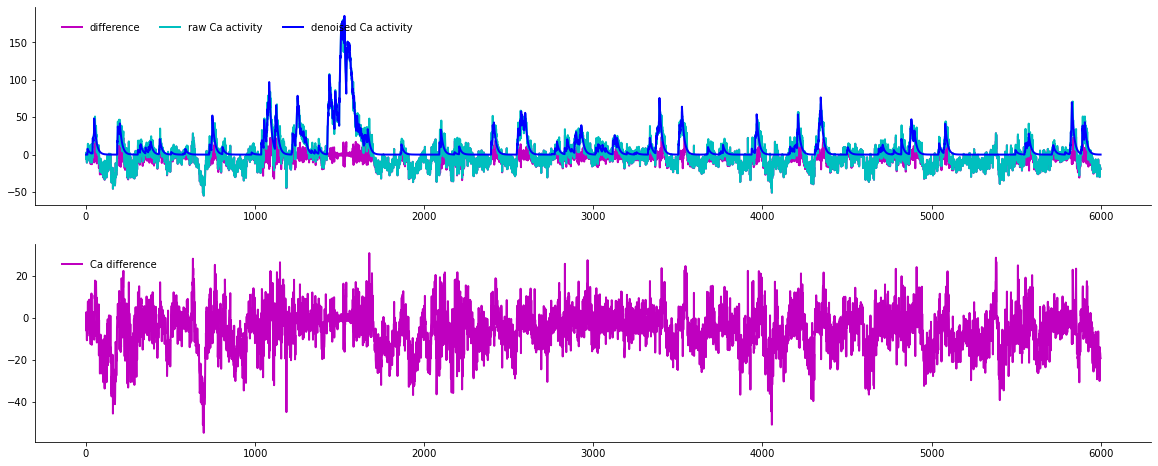

In [279]:
plt.figure(figsize=(20,8))
# plt.plot(c, lw=2, label='denoised')
plt.subplot(211)
plt.plot(raw[i]-c_r1_l0, lw=2, label='difference', c='m')
plt.plot(raw[i], lw=2, label='raw Ca activity', c='c')
plt.plot(c_r1_l0, lw=2, label='denoised Ca activity', c='b')

simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

plt.subplot(212)
plt.plot(raw[i]-c_r1_l0, lw=2, label='Ca difference', c='m')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

### 2. AR(1) and L1

In [177]:
%time c_r1_l1, s_r1_l1, b_r1_l1, g_r1_l1, lam_r1_l1 = deconvolve(raw[i], penalty=1, optimize_g=50, max_iter=50) 

Wall time: 60.6 ms


g is 0.9280246661961138


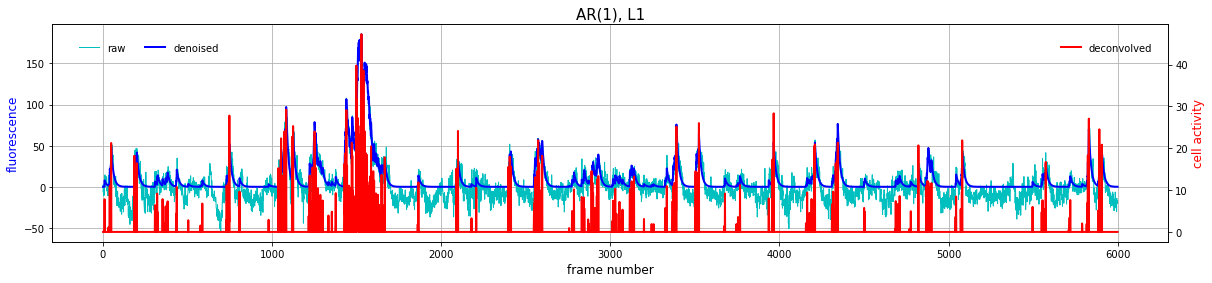

In [323]:
plt.figure(figsize=(20,4))
ax  = plt.gca()
ax2 = ax.twinx()
#simpleaxis(ax)
#simpleaxis(ax2)
ax.plot(raw[i], lw=1, label='raw', c='c')
ax.plot(c_r1_l1, lw=2, label='denoised', c='b')
ax2.plot(s_r1_l1, lw=2, label='deconvolved', c='r')
ax.grid(True)
ax2.legend(ncol=3, frameon=False, loc=(.9,.85));
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
plt.title("AR(1), L1", fontsize=15,color='black')
ax.set_ylabel("fluorescence",fontsize=12,color='blue')
ax2.set_ylabel("cell activity",fontsize=12,color='red')
ax.set_xlabel('frame number', fontsize=12, color='black')
print("g is", g_r1_l1)

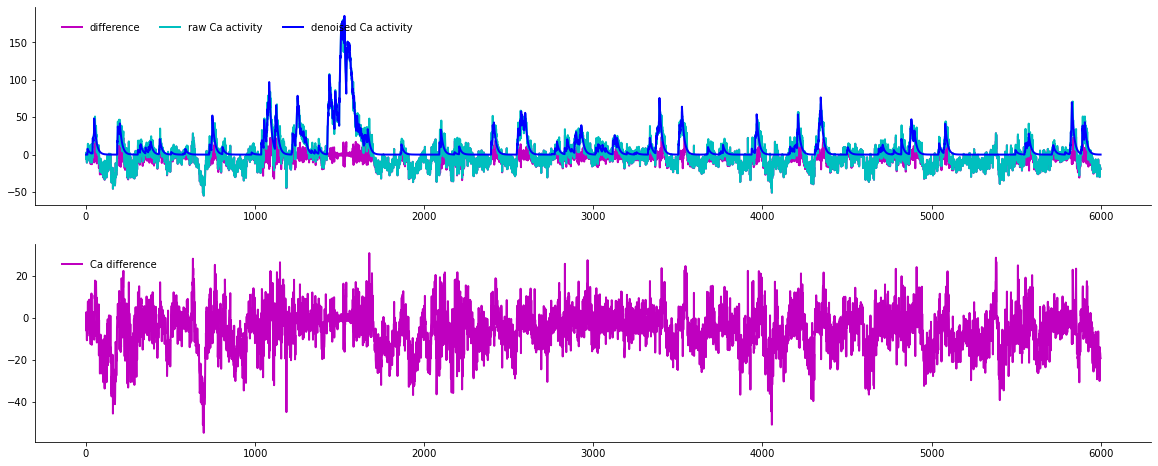

In [277]:
plt.figure(figsize=(20,8))
# plt.plot(c, lw=2, label='denoised')
plt.subplot(211)
plt.plot(raw[i]-c_r1_l1, lw=2, label='difference', c='m')
plt.plot(raw[i], lw=2, label='raw Ca activity', c='c')
plt.plot(c_r1_l1, lw=2, label='denoised Ca activity', c='b')

simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

plt.subplot(212)
plt.plot(raw[i]-c_r1_l1, lw=2, label='Ca difference', c='m')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

### 3. AR(2) and L0

In [181]:
%time c_r2_l0, s_r2_l0, b_r2_l0, g_r2_l0, lam_r2_l0 = deconvolve(raw[i], g=(None,None), penalty=0, optimize_g=50, max_iter=10) 

C:\Users\raymo\Documents\GitHub\OASIS\oasis\functions.py:167: UserWarning: Optimization of AR parameters is already fairly stable for AR(1), but slower and more experimental for AR(2)
  warn("Optimization of AR parameters is already fairly stable for AR(1), "


Wall time: 355 ms


g is (1.884903783034741, -0.8881561841300182)


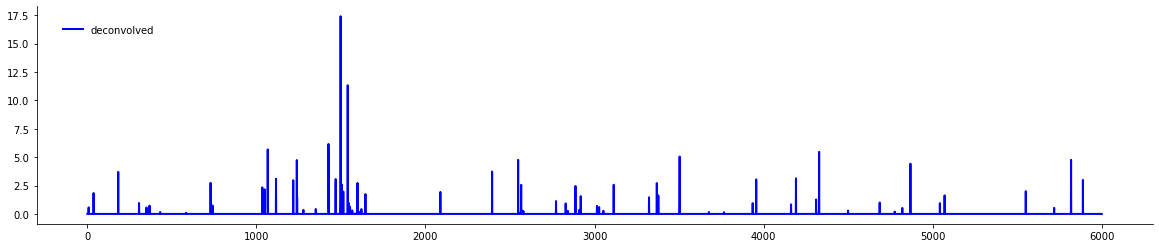

In [182]:
plt.figure(figsize=(20,4))
# plt.plot(c, lw=2, label='denoised')
plt.plot(s_r2_l0, lw=2, label='deconvolved', c='b')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));
print("g is", g_r2_l0)

g is (1.884903783034741, -0.8881561841300182)


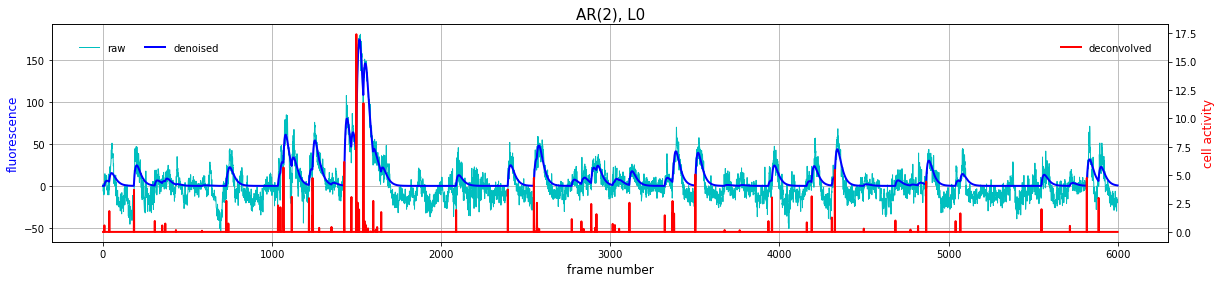

In [322]:
plt.figure(figsize=(20,4))
ax  = plt.gca()
ax2 = ax.twinx()
#simpleaxis(ax)
#simpleaxis(ax2)
ax.plot(raw[i], lw=1, label='raw', c='c')
ax.plot(c_r2_l0, lw=2, label='denoised', c='b')
ax2.plot(s_r2_l0, lw=2, label='deconvolved', c='r')
ax.grid(True)
ax2.legend(ncol=3, frameon=False, loc=(.9,.85));
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
plt.title("AR(2), L0", fontsize=15,color='black')
ax.set_ylabel("fluorescence",fontsize=12,color='blue')
ax2.set_ylabel("cell activity",fontsize=12,color='red')
ax.set_xlabel('frame number', fontsize=12, color='black')
print("g is", g_r2_l0)

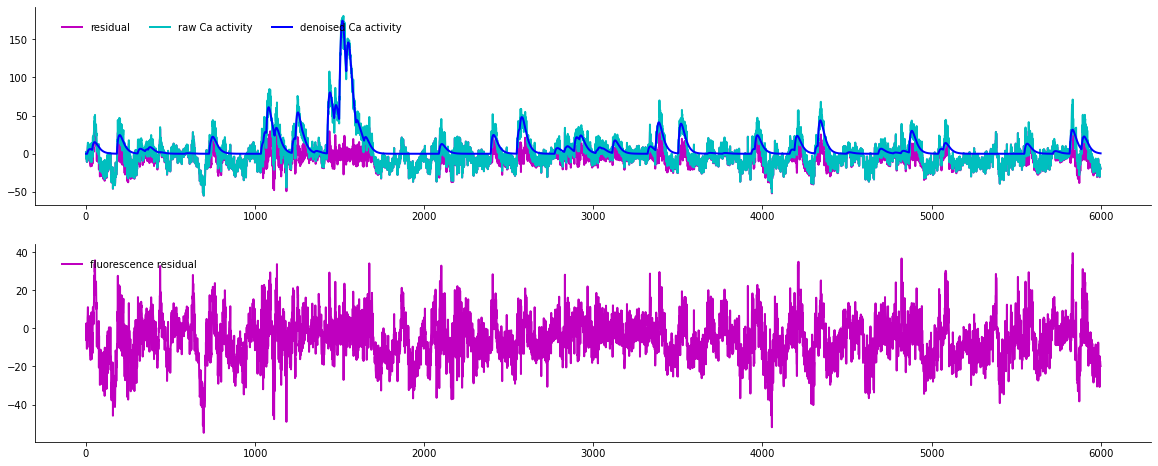

In [270]:
plt.figure(figsize=(20,8))
plt.title("AR(2), L0", fontsize=15,color='black')
# plt.plot(c, lw=2, label='denoised')
plt.subplot(211)
plt.plot(raw[i]-c_r2_l0, lw=2, label='residual', c='m')
plt.plot(raw[i], lw=2, label='raw Ca activity', c='c')
plt.plot(c_r2_l0, lw=2, label='denoised Ca activity', c='b')

simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

plt.subplot(212)
plt.plot(raw[i]-c_r2_l0, lw=2, label='fluorescence residual', c='m')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

### 4. AR(2) and L1

In [184]:
%time c_r2_l1, s_r2_l1, b_r2_l1, g_r2_l1, lam_r2_l1 = deconvolve(raw[i], g=(None,None), penalty=1, optimize_g=50, max_iter=10) 

C:\Users\raymo\Documents\GitHub\OASIS\oasis\functions.py:167: UserWarning: Optimization of AR parameters is already fairly stable for AR(1), but slower and more experimental for AR(2)
  warn("Optimization of AR parameters is already fairly stable for AR(1), "


Wall time: 330 ms


g is (1.884903783034741, -0.8881561841300182)


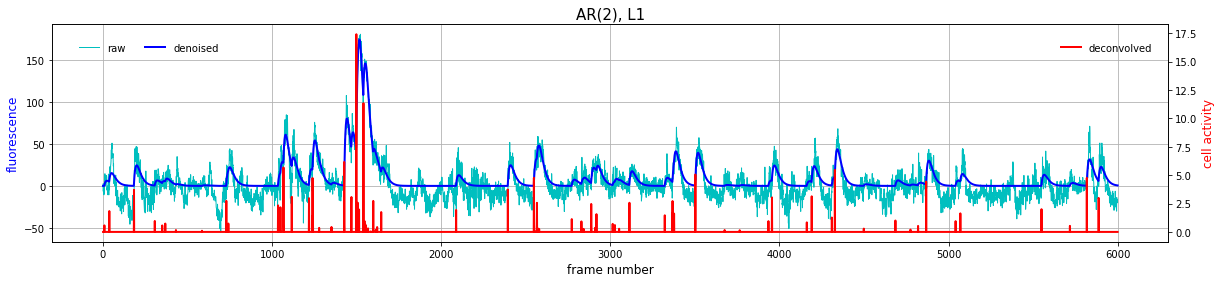

In [325]:
plt.figure(figsize=(20,4))
ax  = plt.gca()
ax2 = ax.twinx()
#simpleaxis(ax)
#simpleaxis(ax2)
ax.plot(raw[i], lw=1, label='raw', c='c')
ax.plot(c_r2_l1, lw=2, label='denoised', c='b')
ax2.plot(s_r2_l1, lw=2, label='deconvolved', c='r')
ax.grid(True)
ax2.legend(ncol=3, frameon=False, loc=(.9,.85));
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
plt.title("AR(2), L1", fontsize=15,color='black')
ax.set_ylabel("fluorescence",fontsize=12,color='blue')
ax2.set_ylabel("cell activity",fontsize=12,color='red')
ax.set_xlabel('frame number', fontsize=12, color='black')
print("g is", g_r2_l1)

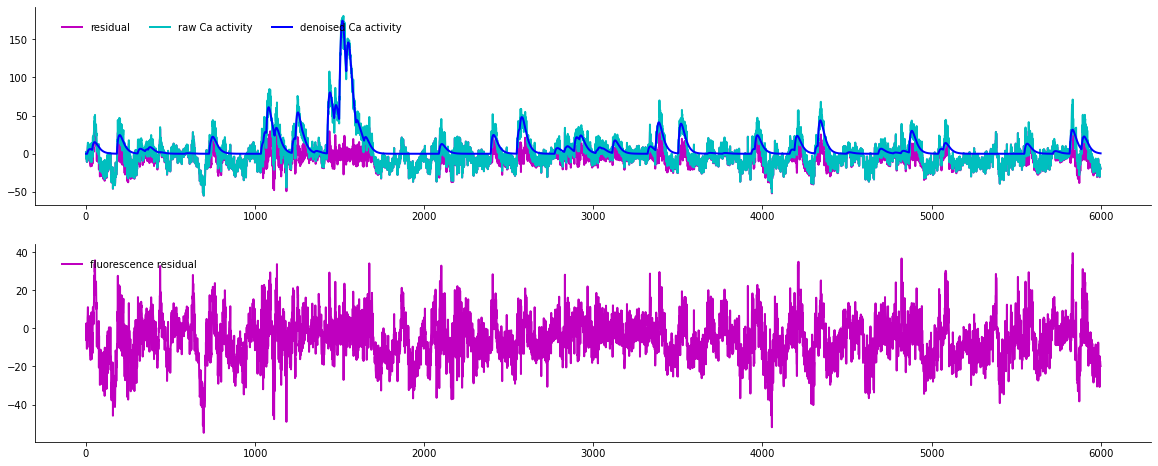

In [290]:
plt.figure(figsize=(20,8))
# plt.plot(c, lw=2, label='denoised')
plt.subplot(211)
plt.plot(raw[i]-c_r2_l1, lw=2, label='residual', c='m')
plt.plot(raw[i], lw=2, label='raw Ca activity', c='c')
plt.plot(c_r2_l1, lw=2, label='denoised Ca activity', c='b')

simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

plt.subplot(212)
plt.plot(raw[i]-c_r2_l1, lw=2, label='fluorescence residual', c='m')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

## 5. Setting optimize_g to >= 50 makes a big difference in AR(2). Try without optimize_g:

### *AR(1)*

In [189]:
%time c11, s11, b11, g11, lam = deconvolve(raw[i], penalty=1)
%time c10, s10, b10, g10, lam = deconvolve(raw[i], penalty=0)

Wall time: 6.01 ms
Wall time: 13 ms


AR(1) l0 and l1 g diff is 0.0
AR(1) g optimization vs no optimzation diff is -0.037972577713348166


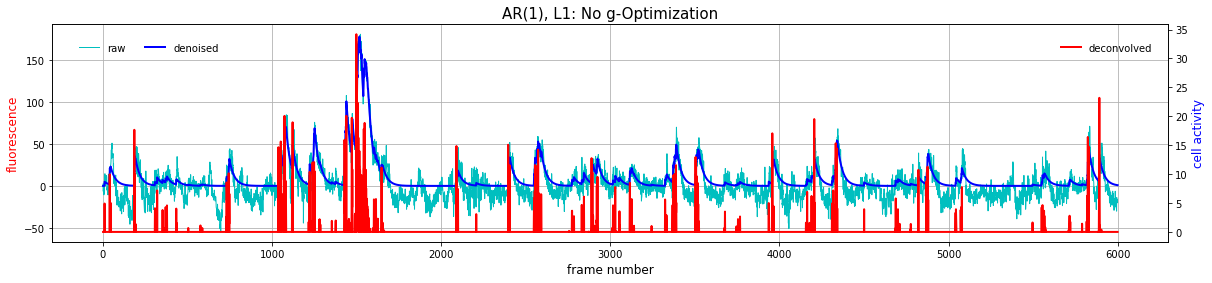

In [293]:
plt.figure(figsize=(20,4))
ax  = plt.gca()
ax2 = ax.twinx()
#simpleaxis(ax)
#simpleaxis(ax2)
ax.plot(raw[i], lw=1, label='raw', c='c')
ax.plot(c11, lw=2, label='denoised', c='b')
ax2.plot(s11, lw=2, label='deconvolved', c='r')
ax.grid(True)
ax2.legend(ncol=3, frameon=False, loc=(.9,.85));
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
plt.title("AR(1), L1: No g-Optimization", fontsize=15,color='black')
ax.set_ylabel("fluorescence",fontsize=12,color='red')
ax2.set_ylabel("cell activity",fontsize=12,color='blue')
ax.set_xlabel('frame number', fontsize=12, color='black')
print("AR(1) l0 and l1 g diff is", g11-g10)
print("AR(1) g optimization vs no optimzation diff is", g_r1_l0-g10)

### *AR(2)*

In [200]:
%time c21, s21, b21, g21, lam = deconvolve(raw[i], g=(None,None), penalty=1)
%time c20, s20, b20, g20, lam = deconvolve(raw[i], g=(None,None), penalty=0)

Wall time: 37.9 ms
Wall time: 49.9 ms


AR(2) l0 and l1 g diff is [0. 0.]
AR(2) g optimization vs no optimzation diff is [ 0.39041975 -0.37652755]


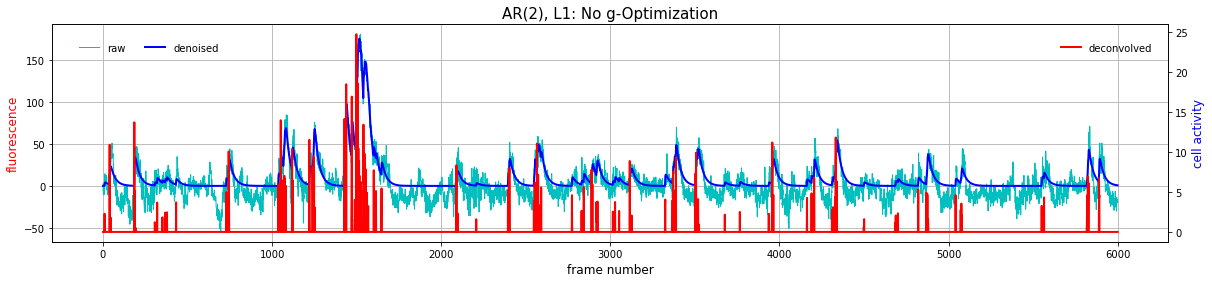

In [292]:
plt.figure(figsize=(20,4))
ax  = plt.gca()
ax2 = ax.twinx()
#simpleaxis(ax)
#simpleaxis(ax2)
ax.plot(raw[i], lw=1, label='raw', c='c')
ax.plot(c21, lw=2, label='denoised', c='b')
ax2.plot(s21, lw=2, label='deconvolved', c='r')
ax.grid(True)
ax2.legend(ncol=3, frameon=False, loc=(.9,.85));
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
plt.title("AR(2), L1: No g-Optimization", fontsize=15,color='black')
ax.set_ylabel("fluorescence",fontsize=12,color='red')
ax2.set_ylabel("cell activity",fontsize=12,color='blue')
ax.set_xlabel('frame number', fontsize=12, color='black')
print("AR(2) l0 and l1 g diff is", g21-g20)
print("AR(2) g optimization vs no optimzation diff is", g_r2_l0-g20)

# Comparison Step

3 Independent Variables: *AR(n), L_n, g_optimize*

## COMPARISON 1: L0 vs L1

### *AR(1), optimized g: L0 vs L1*

AR(1) l0 and l1 g diff is 0.0
Max Ca activity difference is: 2.842170943040401e-14
Max spike differences is: 2.842170943040401e-14


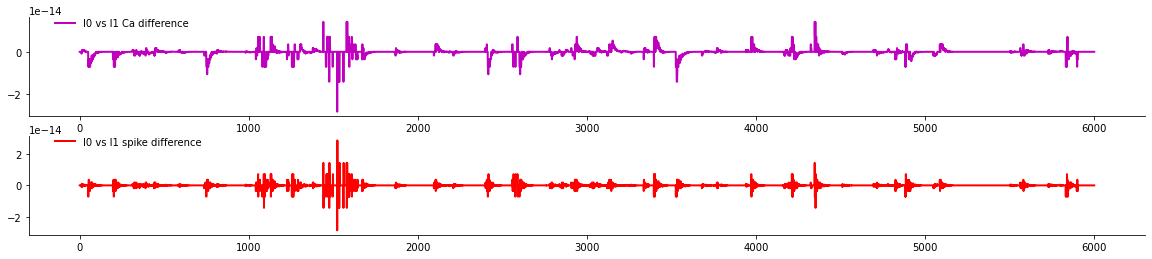

In [180]:
plt.figure(figsize=(20,4))
plt.subplot(211)
plt.plot(c_r1_l0 - c_r1_l1, lw=2, label='l0 vs l1 Ca difference', c='m')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));
print("AR(1) l0 and l1 g diff is", g_r1_l1-g_r1_l0)
print("Max Ca activity difference is:", max(abs(c_r1_l0 - c_r1_l1)))

plt.subplot(212)
plt.plot(s_r1_l0 - s_r1_l1, lw=2, label='l0 vs l1 spike difference', c='r')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));
print ("Max spike differences is:", max(abs(s_r1_l0 - s_r1_l1)))

### *AR(2), optimized g: L0 vs L1*

AR(2) l0 and l1 g diff is 0.0
Max Ca activity difference is: 0.0
Max spike differences is: 0.0


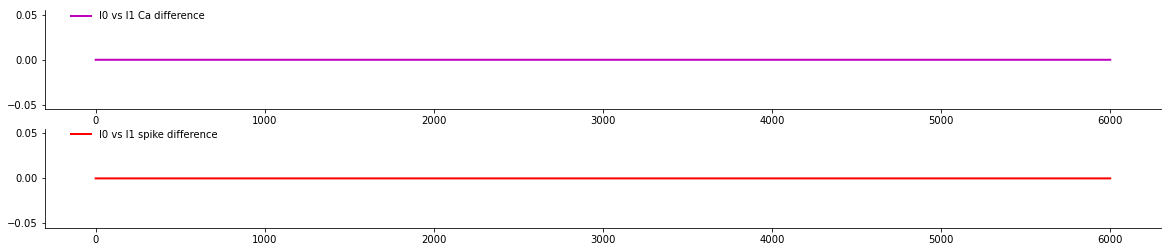

In [198]:
plt.figure(figsize=(20,4))
plt.subplot(211)
plt.plot(c_r2_l0 - c_r2_l1, lw=2, label='l0 vs l1 Ca difference', c='m')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));
print("AR(2) l0 and l1 g diff is", g_r1_l1-g_r1_l0)
print("Max Ca activity difference is:", max(abs(c_r2_l0 - c_r2_l1)))

plt.subplot(212)
plt.plot(s_r2_l0 - s_r2_l1, lw=2, label='l0 vs l1 spike difference', c='r')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));
print ("Max spike differences is:", max(abs(s_r2_l0 - s_r2_l1)))

**Conclusion:** Changing the L_n norm constraint does not seem to make much difference, especially in AR(2).

## COMPARISON 2: Optimize vs Non-optimize

### *AR(1), L_0*

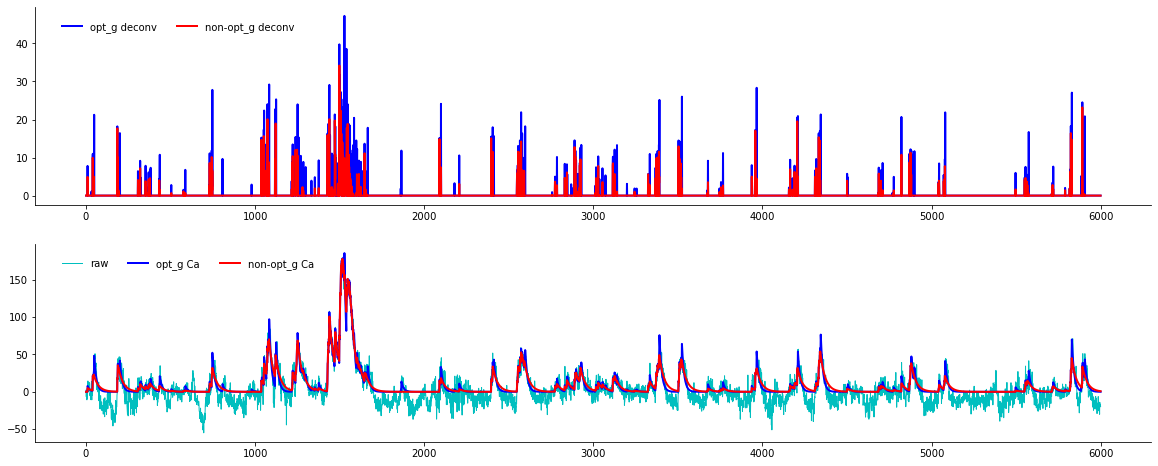

In [320]:
plt.figure(figsize=(20,8))
plt.subplot(211)
plt.plot(s_r1_l0, lw=2, label='opt_g deconv', c='b')
plt.plot(s10, lw=2, label='non-opt_g deconv', c='r')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

plt.subplot(212)
plt.plot(raw[i], lw=1, label='raw', c='c')
plt.plot(c_r1_l0, lw=2, label='opt_g Ca', c='b')
plt.plot(c10, lw=2, label='non-opt_g Ca', c='r')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

**Zoom into frame numbers: [1000-1700]**

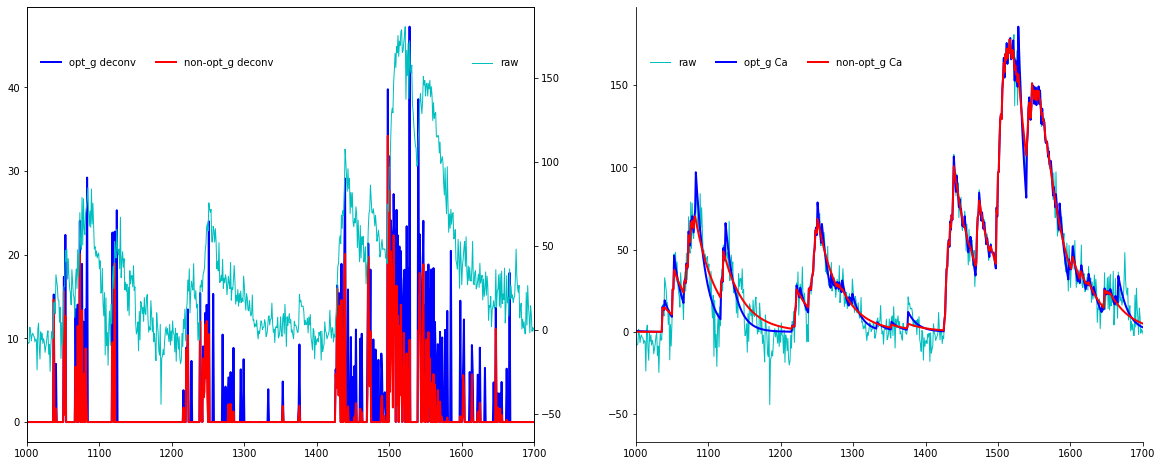

In [319]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.xlim(xmin=1000, xmax=1700)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(raw[i], lw=1, label='raw', c='c')
ax.plot(s_r1_l0, lw=2, label='opt_g deconv', c='b')
ax.plot(s10, lw=2, label='non-opt_g deconv', c='r')
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
ax2.legend(ncol=3, frameon=False, loc=(.87,.85));

plt.subplot(122)
plt.xlim(xmin=1000, xmax=1700)
plt.plot(raw[i], lw=1, label='raw', c='c')
plt.plot(c_r1_l0, lw=2, label='opt_g Ca', c='b')
plt.plot(c10, lw=2, label='non-opt_g Ca', c='r')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

### *AR(2), L_0*

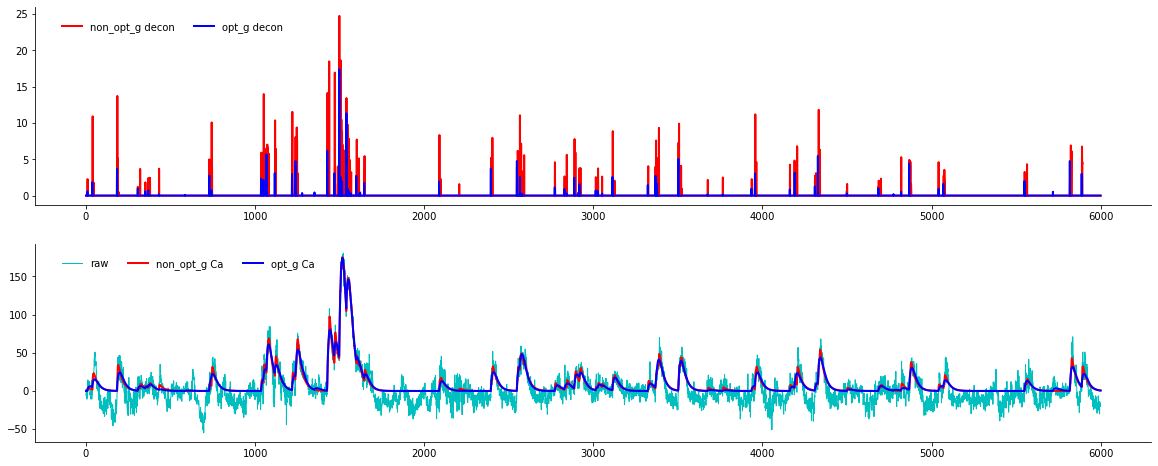

In [295]:
plt.figure(figsize=(20,8))
plt.subplot(211)
plt.plot(s20, lw=2, label='non_opt_g decon', c='r')
plt.plot(s_r2_l0, lw=2, label='opt_g decon', c='b')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

plt.subplot(212)
plt.plot(raw[i], lw=1, label='raw', c='c')
plt.plot(c20, lw=2, label='non_opt_g Ca', c='r')
plt.plot(c_r2_l0, lw=2, label='opt_g Ca', c='b')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

**Zoom into frame numbers: [1000-1700]**

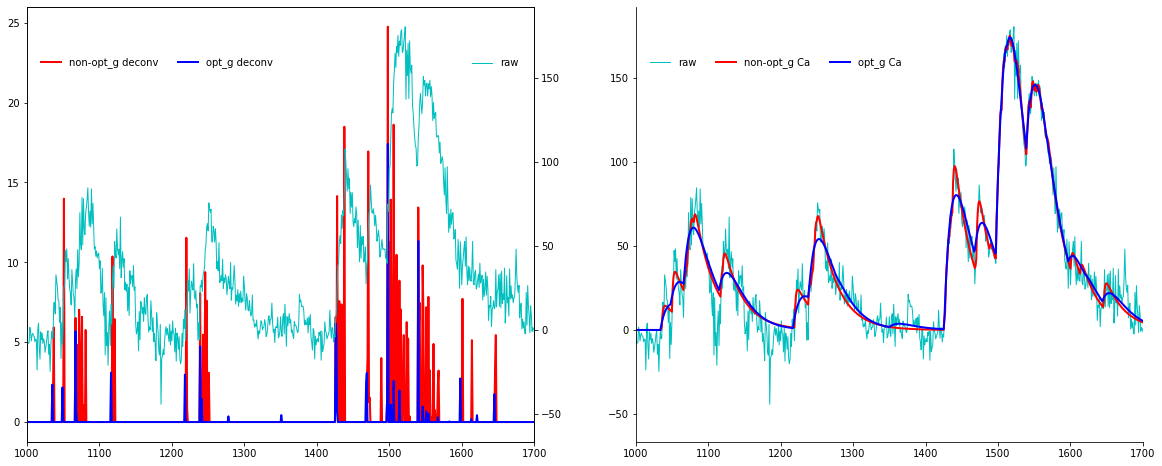

In [321]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.xlim(xmin=1000, xmax=1700)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(raw[i], lw=1, label='raw', c='c')
ax.plot(s20, lw=2, label='non-opt_g deconv', c='r')
ax.plot(s_r2_l0, lw=2, label='opt_g deconv', c='b')
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
ax2.legend(ncol=3, frameon=False, loc=(.87,.85));

plt.subplot(122)
plt.xlim(xmin=1000, xmax=1700)
plt.plot(raw[i], lw=1, label='raw', c='c')
plt.plot(c20, lw=2, label='non-opt_g Ca', c='r')
plt.plot(c_r2_l0, lw=2, label='opt_g Ca', c='b')
simpleaxis(plt.gca())
plt.legend(ncol=3, frameon=False, loc=(.02,.85));

**Conclusion:**

AR(1) spike train is more sparse without optimize_g. AR(2) spike train looks way better with optimize_g > 50.

I think...:

**optimize_g =  # of initial values on the optimization curve**

**max_iter = number of optimization steps**

AR(2) with either L0 or L1 works. Let's test computation cost for different optimize_g values.

## OPTIMIZE_G AND MAX_ITER THAT WORK FOR ALL CELLS

In [ ]:
n = 100
i=1
c={}
s={}
b={}
g={}
lam={}
t={}
s_count={}

for j in range(n):
    t1 = time.process_time()
    c[j], s[j], b[j], g[j], lam[j] = deconvolve(raw[j], g=(None,None), penalty=1, optimize_g=1000, max_iter=3)
    t2 = time.process_time()
    t[j] = t2 - t1
    s_count[j] = len([x for x in s[j] if x > 0])
    print("cellID:", j, "time:", t[j], "decay const:", g[j], "Lagrange multiplier:", lam[j], "spike count:", s_count[j])

C:\Users\raymo\Documents\GitHub\OASIS\oasis\functions.py:167: UserWarning: Optimization of AR parameters is already fairly stable for AR(1), but slower and more experimental for AR(2)
  warn("Optimization of AR parameters is already fairly stable for AR(1), "


cellID: 0 time: 0.40625 decay const: (1.9245633851044348, -0.9259854360811832) Lagrange multiplier: 0.0 spike count: 51
cellID: 1 time: 0.59375 decay const: (1.9177825555083978, -0.9193882830403608) Lagrange multiplier: 0.0 spike count: 194
cellID: 2 time: 4.203125 decay const: (1.7781884119006937, -0.7832301242269384) Lagrange multiplier: 0.0 spike count: 462
cellID: 3 time: 65.03125 decay const: (1.684144372544811, -0.6936110721440897) Lagrange multiplier: 0.0 spike count: 264
cellID: 4 time: 2.9375 decay const: (1.8677363620172316, -0.8721065370471148) Lagrange multiplier: 0.0 spike count: 528
cellID: 5 time: 1.796875 decay const: (1.7981346801395781, -0.8037299045821602) Lagrange multiplier: 0.0 spike count: 144
cellID: 6 time: 2.171875 decay const: (1.5996880181415136, -0.6106788450708239) Lagrange multiplier: 597.0678258758974 spike count: 185
cellID: 7 time: 0.984375 decay const: (1.8437849434408946, -0.8480122178168861) Lagrange multiplier: 543.84596939401 spike count: 59
cellI

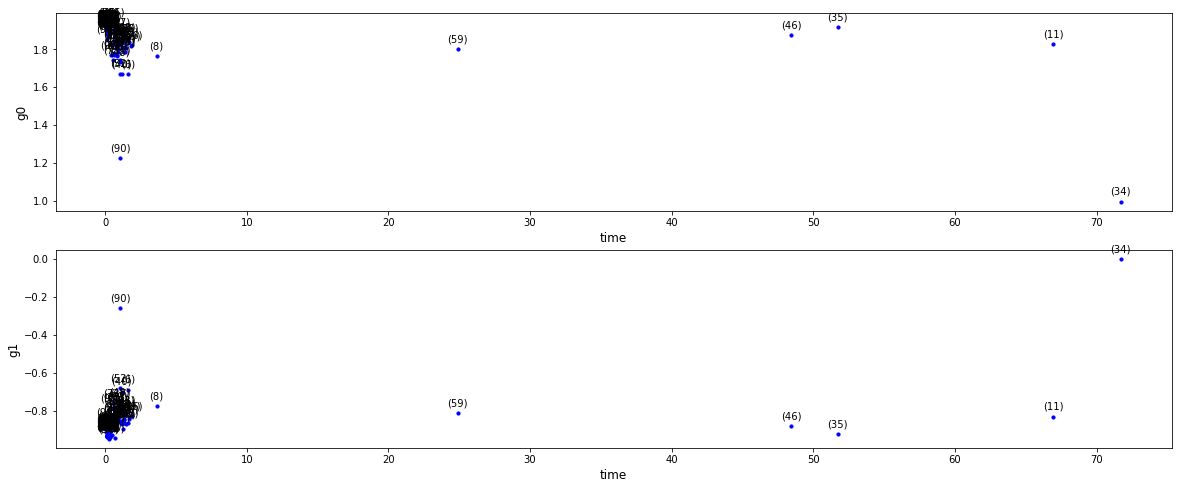

In [527]:
t_v_g0 = []
t_v_g1 = []
for k, v in t.items():
    t_v_g0.append([t[k], g[k][0]])
    t_v_g1.append([t[k], g[k][1]])
    
plt.figure(figsize=(20, 8))
plt.subplot(211)
#plt.xlim(xmax=5)
plt.scatter([row[0] for row in t_v_g0], [row[1] for row in t_v_g0], label='g0', c='b', s=10, cmap=plt.cm.coolwarm)
plt.ylabel("g0",fontsize=12,color='black')
plt.xlabel('time', fontsize=12, color='black')
# plt.colorbar()
# zip joins x and y coordinates in pairs
cell=0
for x,y in zip([row[0] for row in t_v_g0], [row[1] for row in t_v_g0]):

    label = f"({cell})"

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,7), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    cell += 1

plt.subplot(212)
#plt.xlim(xmax=5)
plt.scatter([row[0] for row in t_v_g1], [row[1] for row in t_v_g1], label='g1', c='b', s=10)
plt.ylabel("g1",fontsize=12,color='black')
plt.xlabel('time', fontsize=12, color='black')
#plt.colorbar()
cell=0
for x,y in zip([row[0] for row in t_v_g1], [row[1] for row in t_v_g1]):

    label = f"({cell})"

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,7), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    cell += 1

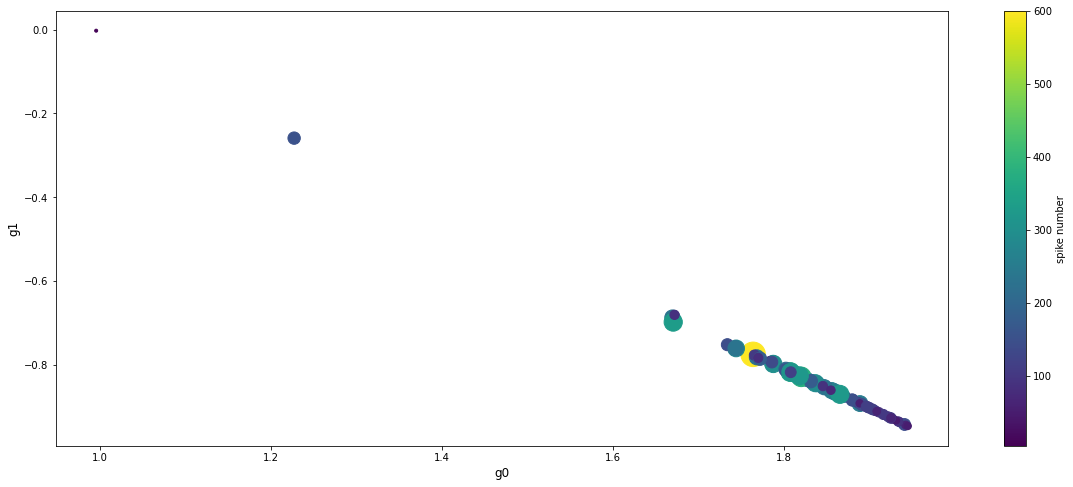

In [544]:
g0_v_g1 = []
for k, v in g.items():
    g0_v_g1.append([g[k][0], g[k][1]])
    
plt.figure(figsize=(20, 8))

plt.scatter([row[0] for row in g0_v_g1], [row[1] for row in g0_v_g1], c=list(s_count.values()), s=list(s_count.values()), cmap=plt.cm.viridis)
plt.ylabel("g1", fontsize=12, color='black')
plt.xlabel("g0", fontsize=12, color='black')
clb=plt.colorbar()
clb.set_label("spike number")

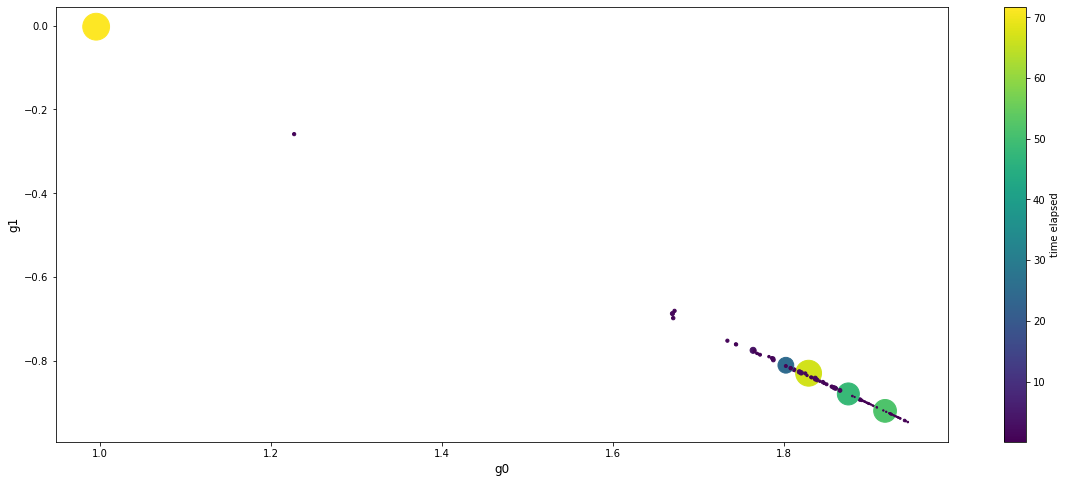

In [546]:
g0_v_g1 = []
for k, v in g.items():
    g0_v_g1.append([g[k][0], g[k][1]])
    
plt.figure(figsize=(20, 8))

plt.scatter([row[0] for row in g0_v_g1], [row[1] for row in g0_v_g1], c=list(t.values()), s=[s*10 for s in list(t.values())], cmap=plt.cm.viridis)
plt.ylabel("g1", fontsize=12, color='black')
plt.xlabel("g0", fontsize=12, color='black')
clb=plt.colorbar()
clb.set_label("time elapsed")

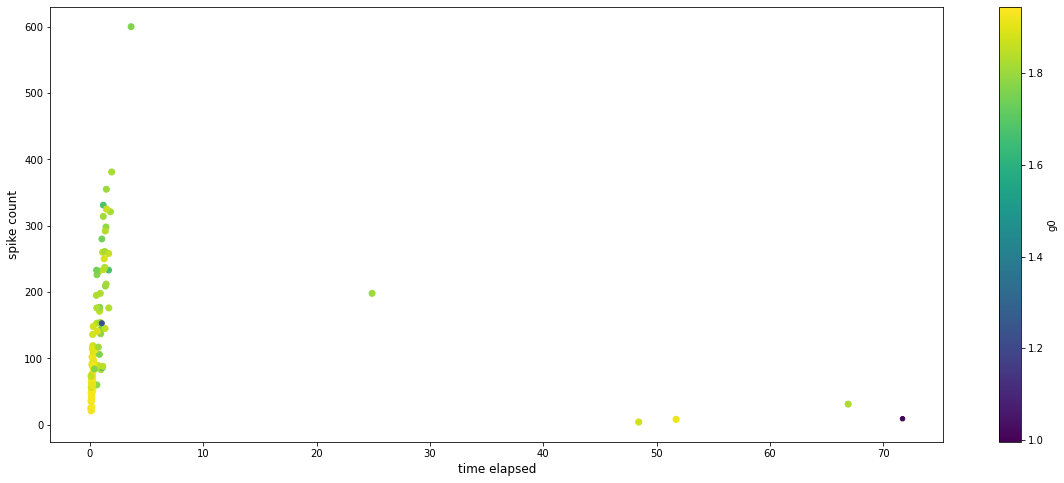

In [579]:
t_v_sn = []
for k, v in t.items():
    t_v_sn.append([t[k], s_count[k]])

plt.figure(figsize=(20, 8))

plt.scatter([row[0] for row in t_v_sn], [row[1] for row in t_v_sn], c=[row[0] for row in g0_v_g1], s=[s*20 for s in [row[0] for row in g0_v_g1]], cmap=plt.cm.viridis)
plt.xlabel("time elapsed", fontsize=12, color='black')
plt.ylabel("spike count", fontsize=12, color='black')
clb=plt.colorbar()
clb.set_label("g0")

$g=(g_1,g_2)$ is related to the decay time $\tau_d$ and rise time $\tau_r$ (in seconds) of the Ca response kernel $e^{-t/\tau_d}-e^{-t/\tau_r}$ as <br>
$g_1=e^{-\frac{1}{\tau_d r}}+e^{-\frac{1}{\tau_r r}}$ and <br>
$g_2=-e^{-\frac{1}{\tau_d r}}\cdot e^{-\frac{1}{\tau_r r}}$ with imaging rate r in Hz.

$g_2=-e^{-\frac{1}{\tau_d r}}\cdot e^{-\frac{1}{\tau_r r}}$<br>
${\ln(-g_2)}=\ln(e^{-\frac{1}{\tau_d r}}\cdot e^{-\frac{1}{\tau_r r}})$<br>
${\ln(-g_2)}=\ln(e^{-\frac{1}{\tau_d r}-\frac{1}{\tau_r r}})$<br>
${\ln(-g_2)}=-\frac{1}{\tau_d r}-\frac{1}{\tau_r r}$<br>
$\frac{1}{\tau_r r}=-{\ln(-g_2)}-\frac{1}{\tau_d r}$<br>
$\frac{1}{\tau_r}=-r{\ln(-g_2)}-\frac{1}{\tau_d}$<br>
$\frac{1}{\tau_r}=-\frac{r\tau_d{\ln(-g_2)}+1}{\tau_d}$<br>
$\tau_r=-\frac{\tau_d}{r\tau_d{\ln(-g_2)}+1}$

In [868]:
import numpy as np
import math as m
t_d = []
t_r = []
print("cell ID\t\t", "decay time constant\t\t", "rise time constant\t\t", "spike count\t\t", "t elapsed")
for cellID in range(100):
    g1 = g[cellID][0]
    g2 = g[cellID][1]
    r = 15
    td = 1 / (r * np.log((-g1 + m.sqrt(pow(g1, 2) + 4 * g2)) / (2 * g2)))
    t_d.append(td)
    tr = -td/(r*td*np.log(-g2)+1)
    t_r.append(tr)
    
    
    print(cellID, "\t\t", td, "\t\t", tr, "\t\t", s_count[cellID], "\t\t\t", t[cellID])

cell ID		 decay time constant		 rise time constant		 spike count		 t elapsed
0 		 1.3797526022175415 		 0.946982908694121 		 95 			 0.546875
1 		 1.4007241552321645 		 1.0319587811825461 		 109 			 1.015625
2 		 1.6127519324135917 		 1.2119040769853289 		 97 			 0.84375
3 		 2.4261044210712113 		 1.762270319615899 		 83 			 0.96875
4 		 0.8915595777054498 		 0.8899480050920291 		 260 			 3.34375
5 		 1.7201716465394639 		 1.196771162012335 		 86 			 0.84375
6 		 0.9842130878821104 		 0.21646184480168393 		 233 			 4.421875
7 		 1.1649937836160333 		 1.1646042313469813 		 250 			 3.78125
8 		 1.065210755701683 		 0.34538380614845393 		 600 			 10.234375
9 		 0.6888588794637862 		 0.6782007562131863 		 261 			 3.71875
10 		 3.0256604461947814 		 1.3281579155145307 		 41 			 0.4375
11 		 33.79989769024393 		 0.3592880725090516 		 31 			 152.65625
12 		 0.658521394613017 		 0.658090520581378 		 355 			 4.3125
13 		 1.5690754946249739 		 0.35485568643711657 		 209 			 3.953125
14 		 0.76169

In [862]:
# Try using numeric optimization solver to verify
from scipy.optimize import fsolve
from math import exp
import math

decay_t = []

print("cell ID\t\t", "time constants\t\t\t\t", "spike count\t\t", "t elapsed\t", "g-error")

for cell in range(100):

    def equations(vars):
        tr, td = vars
        r = 15
        eq1 = exp(-1/(r*td)) + exp(-1/(r*tr)) - g[cell][0]
        eq2 = -exp(-1/(r*td)) * exp(-1/(r*tr)) - g[cell][1]
        return [eq1, eq2]
    dt = fsolve(equations, (0.5, 1))
    decay_t.append(dt)
    
    g0_regen = np.exp(-1/(r*dt[0])) + np.exp(-1/(r*dt[1]))
    g1_regen = -np.exp(-1/(r*dt[0])) * np.exp(-1/(r*dt[1]))
#    print(g0_regen, g1_regen, g[0])

    print(cell, "\t\t", decay_t[cell], "\t\t", s_count[cell], "\t\t\t", t[cell], "\t", math.dist([g0_regen, g1_regen], g[cell]))

cell ID		 time constants				 spike count		 t elapsed	 g-error
0 		 [1.3797526  0.94698291] 		 95 			 0.546875 	 2.482534153247273e-16
1 		 [1.40072416 1.03195878] 		 109 			 1.015625 	 1.1776740121916977e-14
2 		 [1.61275193 1.21190408] 		 97 			 0.84375 	 2.055690403432217e-12
3 		 [1.76227032 2.42610442] 		 83 			 0.96875 	 2.852272717183774e-13
4 		 [0.88994801 0.89155958] 		 260 			 3.34375 	 0.0
5 		 [1.72017165 1.19677116] 		 86 			 0.84375 	 1.4458497151625688e-14
6 		 [0.98421309 0.21646184] 		 233 			 4.421875 	 4.972936794086751e-13
7 		 [1.16499378 1.16460423] 		 250 			 3.78125 	 2.220446049250313e-16
8 		 [0.34538381 1.06521076] 		 600 			 10.234375 	 2.059905059335007e-14
9 		 [0.67820076 0.68885888] 		 261 			 3.71875 	 1.1102230246251565e-16
10 		 [1.32815792 3.02566045] 		 41 			 0.4375 	 2.220446049250313e-16
11 		 [ 0.35928807 33.79989769] 		 31 			 152.65625 	 2.48392398332957e-14
12 		 [0.65809052 0.65852139] 		 355 			 4.3125 	 1.8299830059811034e-14
13 		 [0.3548

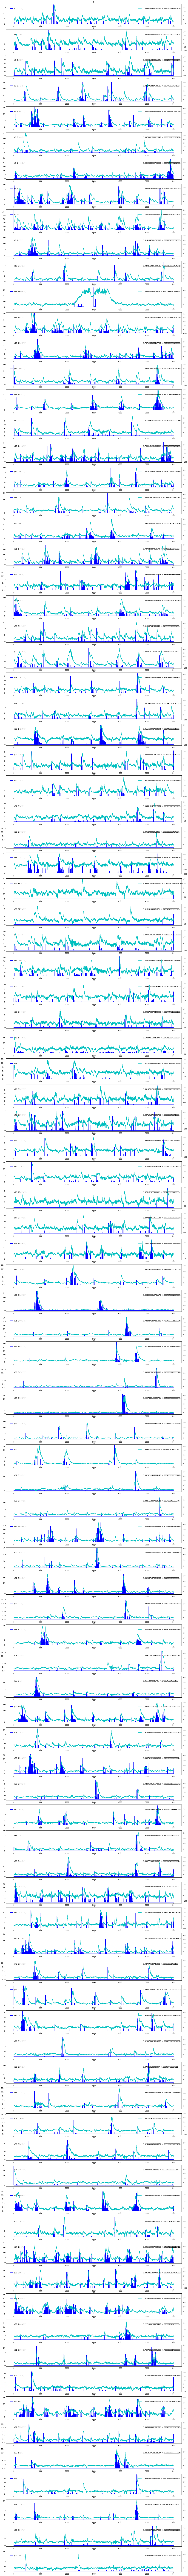

In [554]:
plt.figure(figsize=(20,300))
for k in range(100):
    plt.subplot(100, 1, k+1)
    plt.title(k)
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(raw[k], lw=1, label=g[k], c='c')
    ax.plot(s[k], lw=2, label=(k, t[k]), c='b')
    ax.legend(ncol=3, frameon=False, loc=(.02,.7));
    ax2.legend(ncol=3, frameon=False, loc=(.75,.7));

Cell 100 does not work. Try plugging in g from a cell that worked well.

In [615]:
sub_cell = 75 # subject cell
mod_cell = 10 # model cell

%time cm, sm, bm, gm, lamm = deconvolve(raw[sub_cell], g=(g[mod_cell]), penalty=1)

Wall time: 45.9 ms


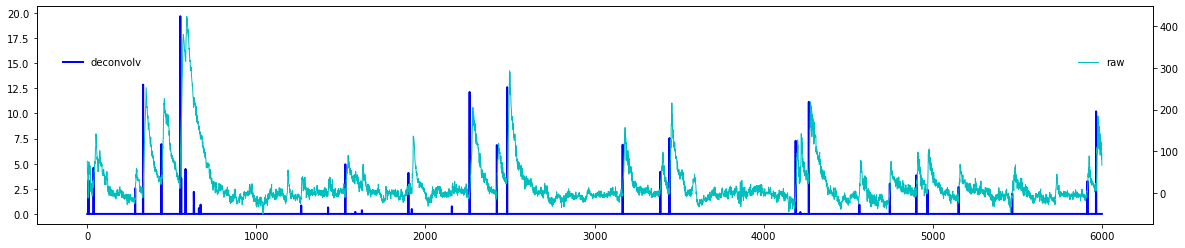

In [617]:
plt.figure(figsize=(20, 4))
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(raw[sub_cell], lw=1, label='raw', c='c')
ax.plot(sm, lw=2, label='deconvolv', c='b')
ax.legend(ncol=3, frameon=False, loc=(.02,.7));
ax2.legend(ncol=3, frameon=False, loc=(.93,.7));

In [746]:
# I want to try optimizing g with a starting point...

sub_cell = 25 # subject cell
mod_cell = 10 # model cell

trials=5
cman={}
sman={}
bman={}
gman={}
lamman={}
for r in range(trials):
    %time cman[r], sman[r], bman[r], gman[r], lamman[r] = deconvolve(raw[sub_cell], g=(g[mod_cell]), penalty=1)#, optimize_g=r*10, max_iter=3)

Wall time: 162 ms
Wall time: 141 ms
Wall time: 124 ms
Wall time: 109 ms
Wall time: 86.8 ms


In [751]:
# Test drive model g on a place cell

subj_cell = 25 # subject cell
mod_cell = 10 # model cell

%time csubj, ssubj, bsubj, gsubj, labsubj = deconvolve(raw[subj_cell], g=(g[subj_cell]), penalty=1)
%time cmod, smod, bmod, gmod, lammod = deconvolve(raw[subj_cell], g=(g[mod_cell]), penalty=1)

Wall time: 168 ms
Wall time: 112 ms


<IPython.core.display.Javascript object>


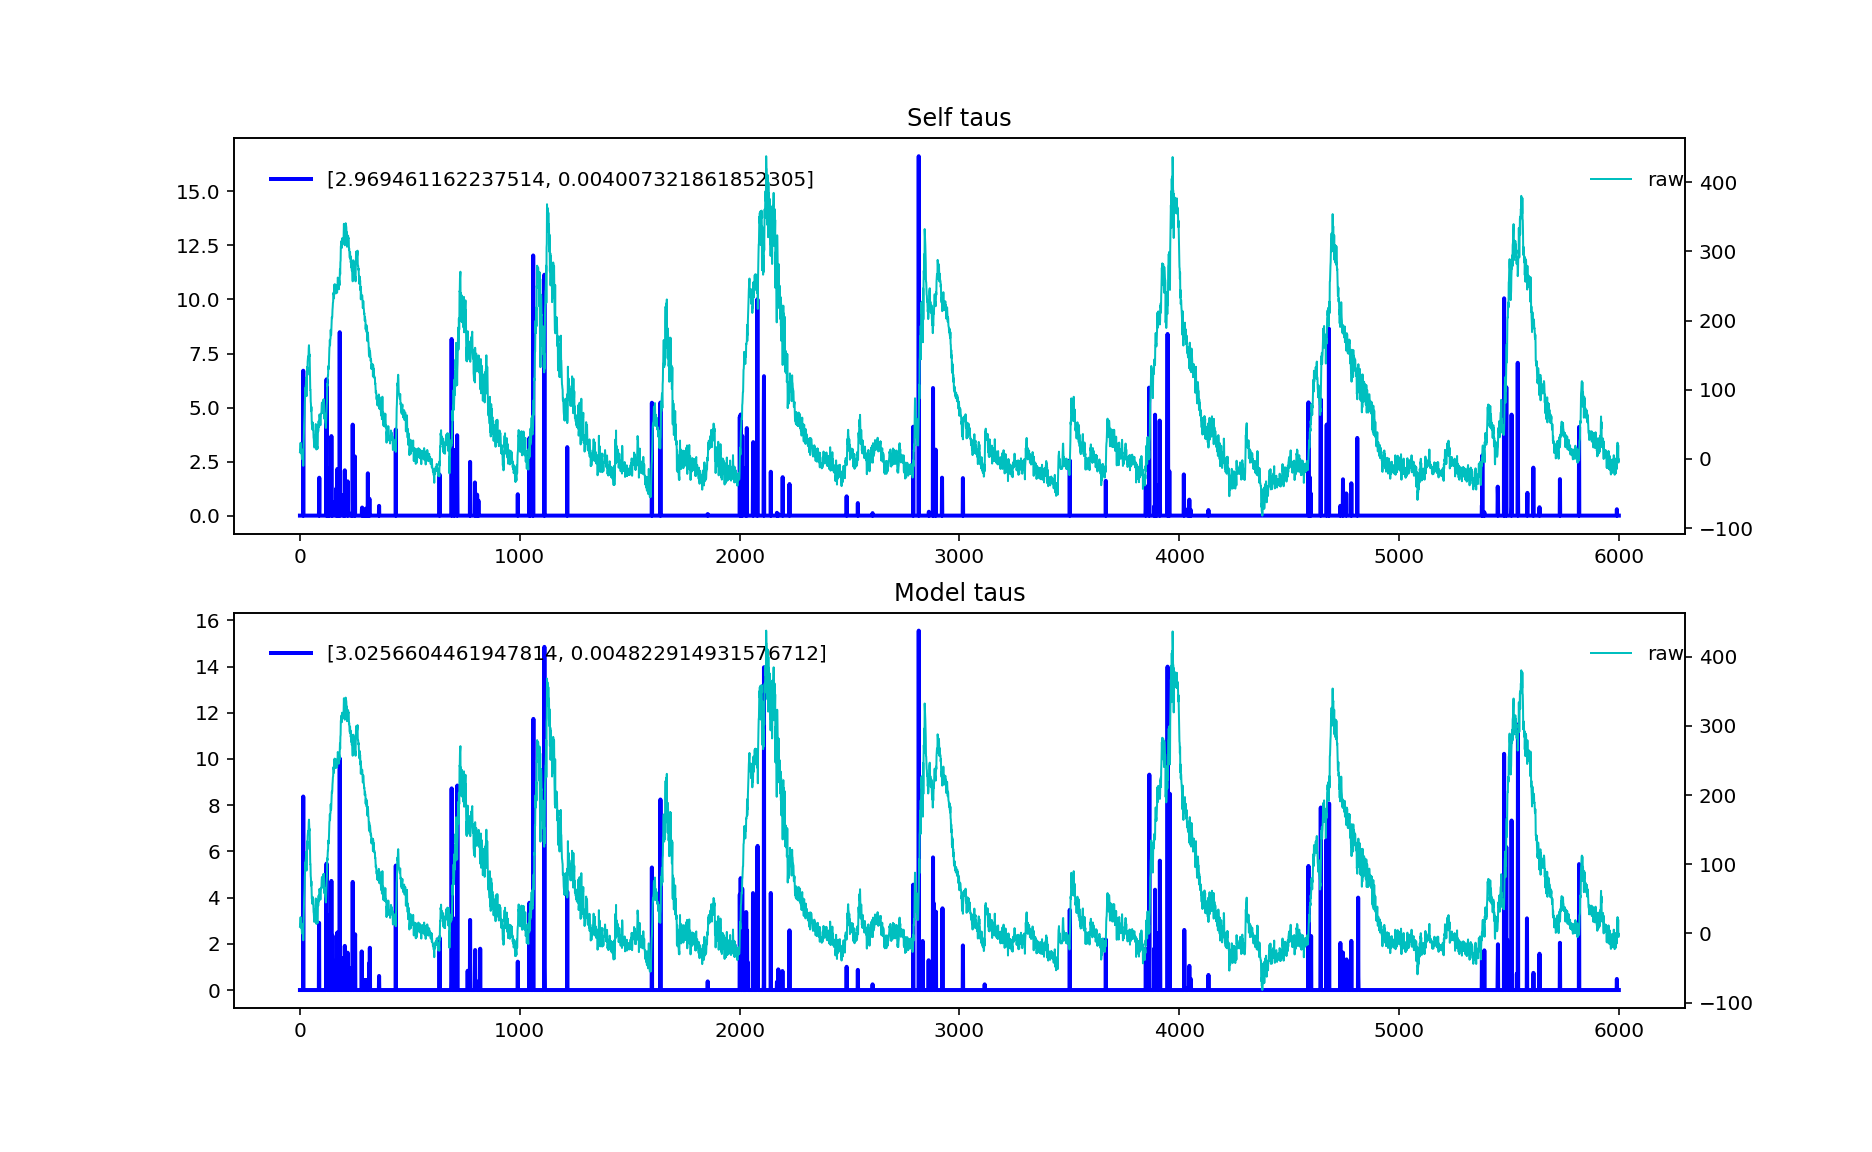

Text(0.5, 1.0, 'Model taus')

In [756]:
plt.figure(figsize=(13,8))

plt.subplot(2, 1, 1)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(raw[subj_cell], lw=1, label='raw', c='c')
ax.plot(ssubj, lw=2, label=[t_d[subj_cell], t_r[subj_cell]], c='b')
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
ax2.legend(ncol=3, frameon=False, loc=(.93,.85));
plt.title('Self taus')

plt.subplot(2, 1, 2)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(raw[subj_cell], lw=1, label='raw', c='c')
ax.plot(smod, lw=2, label=[t_d[mod_cell], t_r[mod_cell]], c='b')
ax.legend(ncol=3, frameon=False, loc=(.02,.85));
ax2.legend(ncol=3, frameon=False, loc=(.93,.85));
plt.title('Model taus')

#### Find g1 and g2 that work. Try to find constraints choosing the two.
$g=(g_1,g_2)$ is related to the decay time $\tau_d$ and rise time $\tau_r$ (in seconds) of the Ca response kernel $e^{-t/\tau_d}-e^{-t/\tau_r}$ as <br>
$g_1=e^{-\frac{1}{\tau_d r}}+e^{-\frac{1}{\tau_r r}}$ and <br>
$g_2=-e^{-\frac{1}{\tau_d r}}\cdot e^{-\frac{1}{\tau_r r}}$ with imaging rate r in Hz.

Where do *optimized* g1 and g2 lie on the $\tau_d, \tau_r$ vs $g_1, g_2$ contour plots?

In [759]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math

In [831]:
tau_d = np.linspace(0, 10, 50)
tau_r = np.linspace(0, 10, 50)
TD, TR = np.meshgrid(tau_d, tau_r)
def find_g1(td, tr):
    r = 15 # frame rate, Hz
    return (np.exp(-1/(r*td)) + np.exp(-1/(r*tr)))

def find_g2(td, tr):
    r = 15
    return -np.exp(-1/(r*td)) * np.exp(-1/(r*tr))

In [864]:
g1 = find_g1(TD, TR)
g2 = find_g2(TD, TR)

<ipython-input-831-656d55c9208d>:6: RuntimeWarning: divide by zero encountered in true_divide
  return (np.exp(-1/(r*td)) + np.exp(-1/(r*tr)))
<ipython-input-831-656d55c9208d>:10: RuntimeWarning: divide by zero encountered in true_divide
  return -np.exp(-1/(r*td)) * np.exp(-1/(r*tr))


<IPython.core.display.Javascript object>


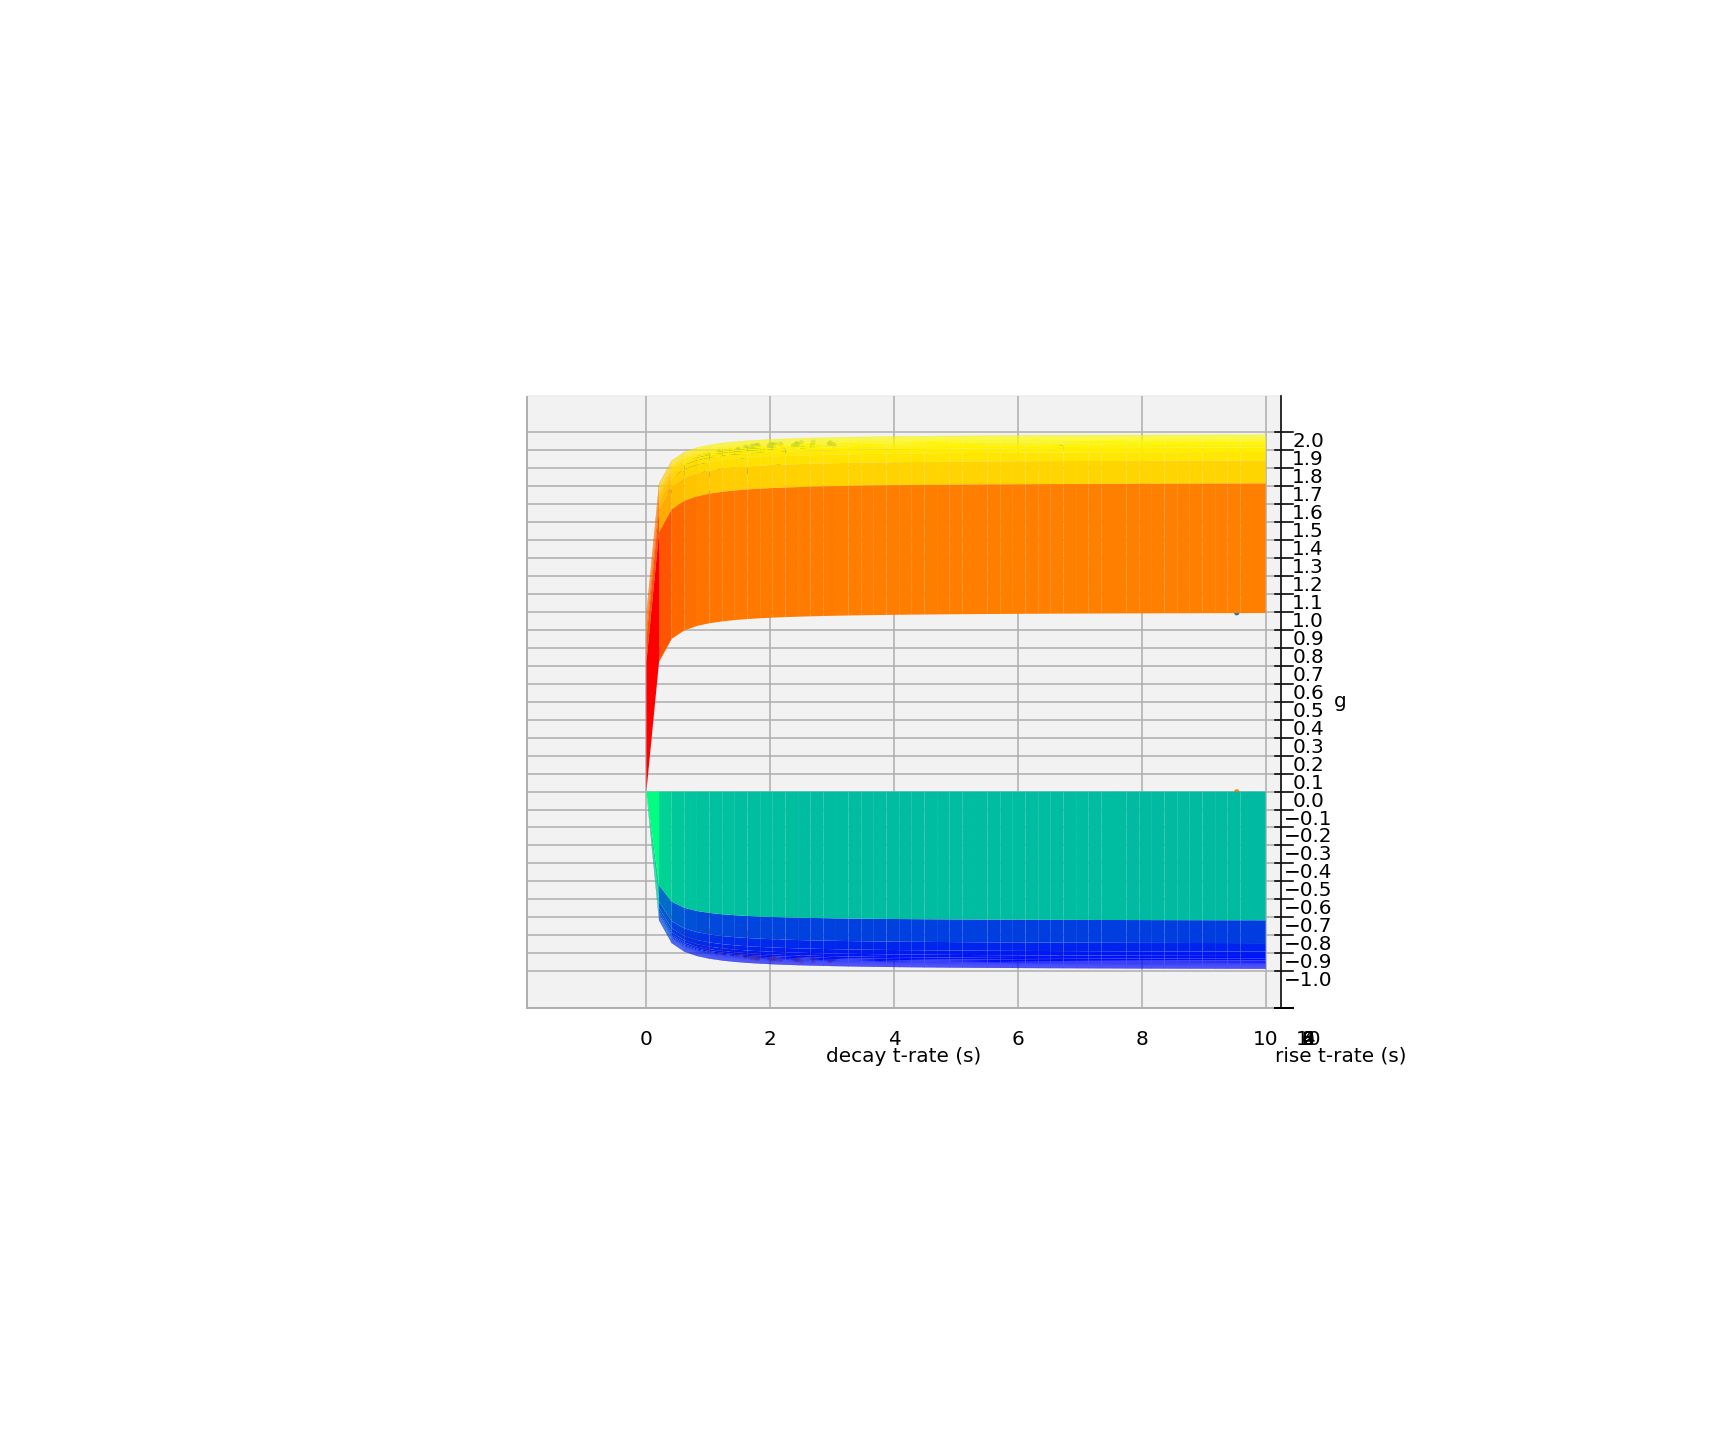

<ipython-input-866-cbcc089446b1>:13: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  ax.set_xlim(xmax=10)
<ipython-input-866-cbcc089446b1>:14: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  ax.set_ylim(ymax=10)


In [866]:
fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection='3d', proj_type = 'ortho')
ax.plot_surface(TD, TR, g1, rstride=1, cstride=1, cmap='autumn', label='g_1')
ax.plot_surface(TD, TR, g2, rstride=1, cstride=1, cmap='winter', label='g_2')
ax.scatter3D(t_d, t_r, [row[0] for row in g0_v_g1], s=3)
ax.scatter3D(t_d, t_r, [row[1] for row in g0_v_g1], s=3)
#ax.scatter3D([row[0] for row in decay_t], [row[1] for row in decay_t], [row[0] for row in g0_v_g1], s=3)
#ax.scatter3D([row[0] for row in decay_t], [row[1] for row in decay_t], [row[1] for row in g0_v_g1], s=3)
ax.set_xlabel('decay t-rate (s)')
ax.set_ylabel('rise t-rate (s)')
ax.set_zlabel('g');
ax.set_zticks(np.linspace(-1, 2, 31))
ax.set_xlim(xmax=10)
ax.set_ylim(ymax=10)
ax.view_init(elev=0, azim=-90)

In [850]:
i=0
g0_regen = np.exp(-1/(r*t_d[i])) + np.exp(-1/(r*t_r[i]))
g1_regen = -np.exp(-1/(r*t_d[i])) * np.exp(-1/(r*t_r[i]))
print(g0_regen, g1_regen, g[0])

1.7990011394487238 -0.806257151836479 (1.8848527427195125, -0.8880592114189108)


In [9]:
m, b = np.polyfit([row[0] for row in g0_v_g1], [row[1] for row in g0_v_g1], 1)
print('the linear best fit function of the g\'s is y =', m,'* x +',b)

NameError: name 'g0_v_g1' is not defined